In [1]:
import json
import numpy as np
import cv2
import math
import os
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import glob
import shutil
from PIL import Image

IMAGE_SIZE = 256

# データの確認

In [2]:
# データの読み込み
json_list = glob.glob('seg_dogs/*.json')
img_list = [f.replace('json', 'jpg') for f in json_list]

In [3]:
no = 1

# アノテーションデータ読み込み
with open(json_list[no]) as f:
    data = json.loads(f.read())
    
# 1つだけ取り出す
shape = data['shapes'][0]
label = shape['label']
points = shape['points']
shape_type = shape['shape_type']

In [4]:
# 画像読み込み
img = cv2.imread(img_list[no])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# アノテーション部分
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv2.fillPoly(mask, np.int32([points]), color=(0, 0, 255))

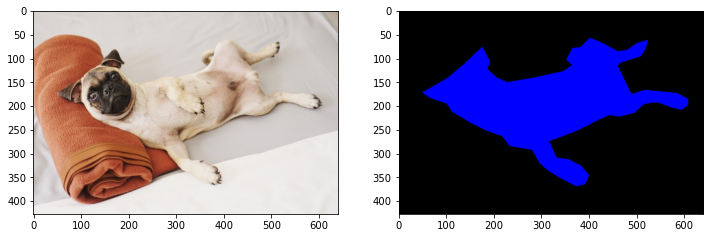

In [5]:
# 横並び
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.imshow(mask)

# データの準備

In [6]:
# フォルダ作成 trainとvalにデータを分けます
train_dir = 'train'
val_dir = 'val'
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    os.mkdir(train_dir + '/images')
    os.mkdir(train_dir + '/masks')
if not os.path.exists(val_dir):
    os.mkdir(val_dir)
    os.mkdir(val_dir + '/images')
    os.mkdir(val_dir + '/masks')

In [7]:
# 114個のデータを用意したので 100 と 14 に分けます
print('データ数', len(json_list))

データ数 114


In [8]:
# train
for ind, file in enumerate(json_list):
    points = []
    with open(file) as f:
        data = json.loads(f.read())
        for s in data['shapes']:
            points.append(s['points'])
    
    if points:
        # 画像データを読み込み画像サイズ取得
        img_path = file.replace('json', 'jpg')
        img = cv2.imread(img_path)

        # ファイル名
        file_name = os.path.basename(img_path)

        # jsonのアノテーションデータ
        # 犬：1
        # 背景：0
        mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        for p in points:
            mask = cv2.fillPoly(mask, np.int32([p]), 1)

        # リサイズ
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)

        # 保存
        file_name = file_name.replace('jpg', 'png')
        if ind<100:
            maskim = Image.fromarray(np.uint8(mask))
            maskim.save(f'train/masks/{file_name}')
            cv2.imwrite(f'train/images/{file_name}', img)
        else:
            maskim = Image.fromarray(np.uint8(mask))
            maskim.save(f'val/masks/{file_name}')
            cv2.imwrite(f'val/images/{file_name}', img)
    